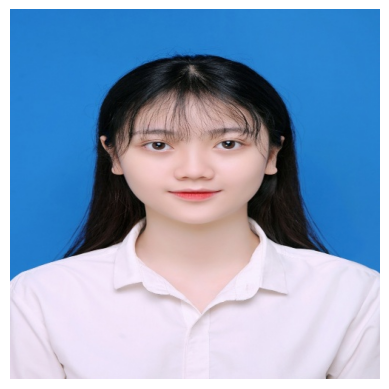

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# Load images
lst_nam = os.listdir('../data/Raw/Training/Nam/')
lst_nu = os.listdir('../data/Raw/Training/Nu/')

# Load images
img1 = cv2.imread('../data/Raw/Training/Nam/' + lst_nam[5], cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('../data/Raw/Training/Nu/' + lst_nu[5])
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray1 = cv2.resize(img1, (96, 128), interpolation = cv2.INTER_AREA)
gray2 = cv2.resize(img2, (96, 128), interpolation = cv2.INTER_AREA)
# Convert images to numpy arrays
img1_arr = np.asarray(gray1)
img2_arr = np.asarray(gray2)

# Compute intensity histograms
hist1, bins1 = np.histogram(gray1, bins=256, range=(0, 255), density = True)
hist2, bins2 = np.histogram(gray2, bins=256, range=(0, 255), density = True)

# Plot histograms
# plt.subplot(121)
plt.imshow(img2, cmap='gray')
plt.axis('off')
# Vẽ histogram
# plt.subplot(122)
# plt.hist(img2_arr.ravel(), bins=256, range=[0, 256], density = True)
# plt.xlabel('Pixel value')
# plt.ylabel('Frequency')

# Hiển thị đồ thị
plt.show()

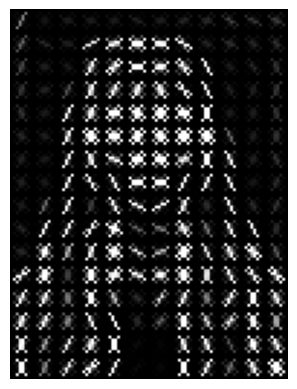

[161.50655194  88.63582921 105.08736129 156.82322677]


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import os, cv2

# # Load ảnh lên
# image = data.astronaut()

# Load images
lst_nam = os.listdir('../data/Raw/Training/Nu/')

# Load images
img = cv2.imread('../data/Raw/Training/Nu/' + lst_nam[1])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (96, 128), interpolation = cv2.INTER_AREA)

# Tính toán HOG
fd, hog_image = hog(gray, orientations=4, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize = True)

# Hiển thị ảnh gốc
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

# plt.axis('off')
# plt.imshow(gray, cmap=plt.cm.gray)
# print(fd)
# print(len(fd))
# print(min(fd))
# print(max(fd))
# Hiển thị ảnh HOG
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
plt.axis('off')
plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
plt.show()

a = np.zeros((4))
for i in range(len(fd)):
    a[i%4] += fd[i]

print(a)


In [5]:
hog_image.shape

(128, 96)

0.110107421875


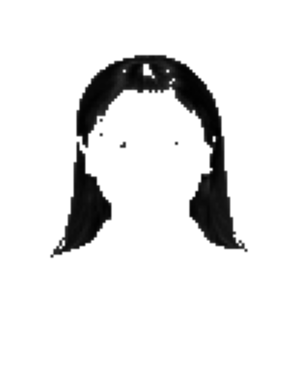

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# Load images
lst_nam = os.listdir('../data/Raw/Training/Nam/')
lst_nu = os.listdir('../data/Raw/Training/Nu/')

# Load images
img1 = cv2.imread('../data/Raw/Training/Nam/' + lst_nam[5], cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('../data/Raw/Training/Nu/' + lst_nu[5], cv2.IMREAD_GRAYSCALE)
gray1 = cv2.resize(img1, (96, 128), interpolation = cv2.INTER_AREA)
gray2 = cv2.resize(img2, (96, 128), interpolation = cv2.INTER_AREA)
# Convert images to numpy arrays
img1_arr = np.asarray(gray1)
img2_arr = np.asarray(gray2)

count = 0
img_black = np.ones((128, 96), dtype = np.uint8) * 255
for i in range(0,128):
  for j in range(0,96):
    if img2_arr[i][j] <= 51 :
      img_black[i][j] = img2_arr[i][j]
      count += 1
print(count/(128*96))
  
plt.axis('off')
plt.imshow(img_black, cmap=plt.cm.gray)
plt.show()

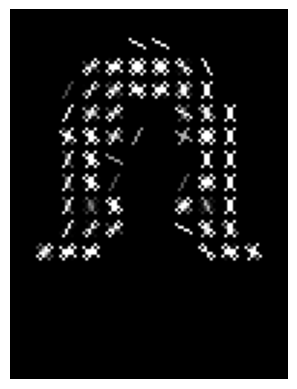

[75.69420165 27.99013322 49.72800159 46.28734672]


In [30]:
fd, hog_image = hog(img_black, orientations=4, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize = True)

# Hiển thị ảnh gốc
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

# plt.axis('off')
# plt.imshow(gray, cmap=plt.cm.gray)
# print(fd)
# print(len(fd))
# print(min(fd))
# print(max(fd))
# Hiển thị ảnh HOG
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
plt.axis('off')
plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)

plt.show()

a = np.zeros((4))
for i in range(len(fd)):
    a[i%4] += fd[i]

print(a)

In [12]:
a = np.zeros((8))
hog_feature = np.load('../data/HOG_features/nu_1.npy')

In [13]:
for i in range(len(hog_feature)):
    a[i%8] += hog_feature[i]

In [14]:
a

array([130.36557751,  71.74367671,  60.13179772,  46.18374221,
        70.7749937 ,  55.72458371,  95.87443026, 104.89398731])

In [11]:
a = np.zeros((8))
hog_feature = np.load('../data/HOG_features/nam_1.npy')
for i in range(len(hog_feature)):
    a[i%8] += hog_feature[i]
a

array([119.67772062,  74.62989575,  77.50685454,  43.92344486,
        76.84731509,  68.85537084, 104.28277751,  90.52069496])